<a href="https://colab.research.google.com/github/JacoboGGLeon/pipeline/blob/main/Binary%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier: Binary Classifier with Pytorch

## References

* [Modeling Pipeline Optimization With scikit-learn](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)

--------

## Aditional resources:
* [Sherin Thomas explains how to build a pipeline in PyTorch for deep learning workflows]()




## Notebook

### Noteboook requeriments

In [ ]:
!pip install torchviz

### Load libraries

In [ ]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchviz as tv

### Load data

In [ ]:
#importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

shape of x: (569, 30)
shape of y: (569,)


### Preprocess data

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length


In [ ]:
trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

### Modeling

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x


In [ ]:
#hyper parameters
learning_rate = 0.01
epochs = 700

# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss() # 

#### Train

In [ ]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)

    tv.make_dot(output.mean(), params=dict(model.named_parameters()), show_attrs=True)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.014197537675499916	 accuracy : 0.9964850615114236
epoch 50	loss : 0.01347027625888586	 accuracy : 0.9964850615114236
epoch 100	loss : 0.012796654365956783	 accuracy : 0.9964850615114236
epoch 150	loss : 0.012153781950473785	 accuracy : 0.9964850615114236
epoch 200	loss : 0.011540776118636131	 accuracy : 0.9982425307557118
epoch 250	loss : 0.010967917740345001	 accuracy : 0.9982425307557118
epoch 300	loss : 0.010420945473015308	 accuracy : 1.0
epoch 350	loss : 0.009915405884385109	 accuracy : 1.0
epoch 400	loss : 0.009453307837247849	 accuracy : 1.0
epoch 450	loss : 0.00900191068649292	 accuracy : 1.0
epoch 500	loss : 0.008587311953306198	 accuracy : 1.0
epoch 550	loss : 0.008207677863538265	 accuracy : 1.0
epoch 600	loss : 0.007832941599190235	 accuracy : 1.0
epoch 650	loss : 0.007485290057957172	 accuracy : 1.0


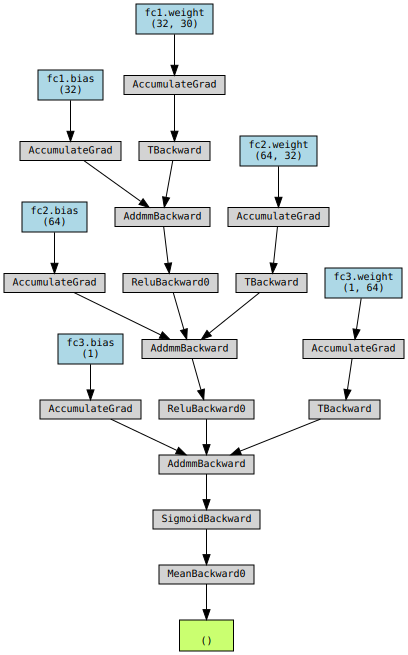

In [ ]:
tv.make_dot(output.mean(), params=dict(model.named_parameters()))

#### Results

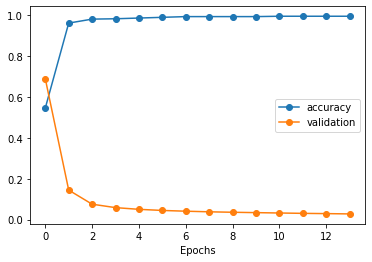

In [ ]:
#plotting the accuracy
plt.plot(accur, 'o-', label='accuracy')
plt.plot(losses, 'o-', label='validation')
#plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
#plt.ylabel('loss')
plt.legend()
plt.show()